In [1]:
# Import librairies
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

C:\Users\MySelf\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((105, 2), (45, 2), (105,), (45,))

#### Q1. Why is it important to scale the inputs when using SVMs?

In [3]:
svm_clf = SVC(kernel="linear", C=100)

In [4]:
x0 = np.linspace(0, 5.5, 200)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [5]:
svm_clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = svm_clf.predict(X)
accuracy_score(y, y_pred)

0.96

In [7]:
# Standardize the data before modeling  
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [8]:
svm_clf.fit(X_scaled, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
y_pred = svm_clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.96

[0, 2, 0, 2]

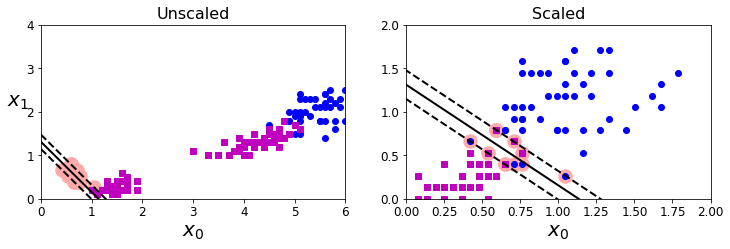

In [10]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 10)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 4])

plt.subplot(122)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([0, 2, 0, 2])

The purpose of SVM is to fit the largest possible "street" between the classes and SVMs are sensitive to the feature scales. Therefore the scaling of inputs is necessary if we don't want to neglect small features.

#### Q2. How can an SVM classifier output a confidence score when it classifies an instance? demonstrate with a block of code.

The decision_function method of SVC and NuSVC gives per-class scores for each sample. We can use the distance between the test instance and the decision boundary as a confidence score and output it.

In [11]:
y_d = svm_clf.decision_function(X)
w = np.linalg.norm(svm_clf.coef_)
dist = y_d / w
dist

array([0.33237972, 0.33237972, 0.25671233, 0.4080471 , 0.33237972,
       0.69014038, 0.39775897, 0.4080471 , 0.33237972, 0.34266785,
       0.4080471 , 0.48371449, 0.26700047, 0.0399983 , 0.18104494,
       0.53880561, 0.38747083, 0.39775897, 0.62476113, 0.47342636,
       0.55938188, 0.53880561, 0.02971016, 0.75551963, 0.71071666,
       0.48371449, 0.61447299, 0.4080471 , 0.33237972, 0.48371449,
       0.48371449, 0.53880561, 0.34266785, 0.33237972, 0.34266785,
       0.18104494, 0.25671233, 0.34266785, 0.25671233, 0.4080471 ,
       0.32209158, 0.32209158, 0.25671233, 0.74523149, 0.84147516,
       0.39775897, 0.48371449, 0.33237972, 0.4080471 , 0.33237972,
       3.61395453, 3.527999  , 3.83066855, 3.01890356, 3.60366639,
       3.3972405 , 3.74471303, 2.29309409, 3.47290789, 3.00861542,
       2.44442887, 3.30099684, 2.82276581, 3.61395453, 2.71623401,
       3.38695236, 3.527999  , 2.8984332 , 3.527999  , 2.81247767,
       3.95113892, 3.01890356, 3.83066855, 3.48319603, 3.24590

#### Q3. If you train an SVM classifier with an RBF Kernel and you find out that it underfits the training set. Should you increase/ decrease the gamma? What about C? write a code to prove your statement.

Let's calculate the accuracy score for different values of gamma and/or C

In [12]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.01))
))
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.score(X,y)

0.6666666666666666

In [13]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=30, C=0.01))
))
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.score(X,y)

0.6666666666666666

In [14]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=1, C=0.01))
))
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.score(X,y)

0.6666666666666666

In [15]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.2))
))
rbf_kernel_svm_clf.fit(X, y)
rbf_kernel_svm_clf.score(X,y)

0.9666666666666667

It seems that increasing or decreasing the gamma value doesn't change anything. On the contrary, increasing the C value improves the accuracy score and can decrease the underfitting. Now let's see the test accuracy after finding the best parameters.

In [16]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_scaled, y)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_scaled,y))

Best CV params {'C': 10, 'gamma': 0.1}
Best CV accuracy 0.96
Test accuracy of best grid search hypers: 0.96


#### Q4. How can you train a SVM regressor on a sample data?

We use the LinearSVR function to train a SVM regressor on a sample data. We keep using the iris dataset

In [17]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svr_reg= Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR())
    ])

In [18]:
svr_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

Let's see how it performs on the training set

In [19]:
from sklearn.metrics import mean_squared_error

y_pred = svr_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.10658039153557908

And now let's look at the RMSE

In [20]:
np.sqrt(mse)

0.3264665243720695

The RMSE is quite low which is a good thing.